## Toyota Corolla Multiple Linear Reg

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df=pd.read_csv("D:\Excelr Assignments\Multi Linear Regression\ToyotaCorolla.csv", encoding='latin1')

In [136]:
df.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [137]:
new_df=df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]


new_df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [138]:
#duplicate values

new_df.duplicated().sum()

1

In [139]:
new_df=new_df.drop_duplicates()# dropping duplicated values

In [140]:
new_df.duplicated().sum()

0

In [141]:
new_df.isnull().sum()#checking null values

Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

<AxesSubplot:>

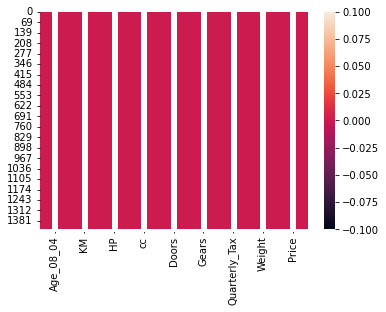

In [142]:
sns.heatmap(new_df.isnull(),annot=True)

In [143]:
new_df.dtypes# checking datatypes 

Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
Price            int64
dtype: object

In [144]:
new_df.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108,10720.915679
std,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882,3608.732978
min,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000,8450.000000
50%,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000,9900.000000
75%,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000,11950.000000
max,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000,32500.000000


In [145]:
#Checking CoRelation As it Multi Linear Regression using Pearson

new_df.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143,0.314134
cc,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077,0.124375
Doors,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734,0.183604
Gears,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238,0.063831
Quarterly_Tax,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988,0.211508
Weight,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869,1.000000


In [146]:
new_df[new_df.corr()>80].sum() # No High Correlation Found between Features

Age_08_04        0.0
KM               0.0
HP               0.0
cc               0.0
Doors            0.0
Gears            0.0
Quarterly_Tax    0.0
Weight           0.0
Price            0.0
dtype: float64

In [147]:
#Checking CoRelation As it Multi Linear Regression using Spearman Rank 


new_df.corr(method ='spearman')

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.531130,-0.091289,-0.113872,-0.132429,-0.023289,-0.272817,-0.381007,-0.841952
KM,0.531130,1.000000,-0.203164,0.186191,-0.038971,0.019787,0.026023,-0.062033,-0.614852
HP,-0.091289,-0.203164,1.000000,0.364967,0.152526,0.136185,0.063020,0.168533,0.234190
cc,-0.113872,0.186191,0.364967,1.000000,0.151083,0.072247,0.520732,0.684018,0.118364
Doors,-0.132429,-0.038971,0.152526,0.151083,1.000000,-0.166590,0.355246,0.444698,0.200262
Gears,-0.023289,0.019787,0.136185,0.072247,-0.166590,1.000000,0.100586,0.015664,0.076227
Quarterly_Tax,-0.272817,0.026023,0.063020,0.520732,0.355246,0.100586,1.000000,0.719808,0.320491
Weight,-0.381007,-0.062033,0.168533,0.684018,0.444698,0.015664,0.719808,1.000000,0.414465
Price,-0.841952,-0.614852,0.234190,0.118364,0.200262,0.076227,0.320491,0.414465,1.000000


In [148]:
new_df[new_df.corr()>80].sum() # No correation Found 

Age_08_04        0.0
KM               0.0
HP               0.0
cc               0.0
Doors            0.0
Gears            0.0
Quarterly_Tax    0.0
Weight           0.0
Price            0.0
dtype: float64

In [149]:
new_df.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight', 'Price'],
      dtype='object')

In [150]:
# Renaming Columns


new_df.rename(columns={'Age_08_04':"AGE",'cc':"CC",'Quarterly_Tax':"Quarterly Tax"},inplace=True)

In [151]:
new_df.columns

Index(['AGE', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Quarterly Tax', 'Weight',
       'Price'],
      dtype='object')

In [152]:
new_df_shape=new_df.shape

new_df_shape

(1435, 9)

C:\Users\ppran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM'>

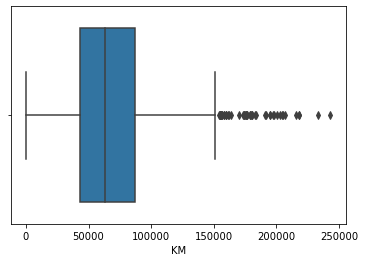

In [153]:
sns.boxplot(new_df['KM'])

## Oulier Detection and Removal Using Iqr Method

In [154]:
##Iqr calculations for outlier detection

per25=new_df['KM'].quantile(0.25)
per75=new_df['KM'].quantile(0.75)

iqr=per75-per25

upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr


print(upper_limit)
print(lower_limit)


# Finding the outliers

new_df[new_df['KM']>upper_limit]


#Dropping the outliers

new_df=new_df[new_df['KM']<upper_limit]

153103.75
109062.25


In [155]:
new_df[new_df['KM']>upper_limit] # No outliers in Km columns

,AGE,KM,HP,CC,Doors,Gears,Quarterly Tax,Weight,Price


In [156]:
new_df.shape

(1386, 9)

In [157]:
new_df.columns

Index(['AGE', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Quarterly Tax', 'Weight',
       'Price'],
      dtype='object')

In [158]:
per25=new_df['AGE'].quantile(0.25)
per75=new_df['AGE'].quantile(0.75)

iqr=per75-per25

upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr


print(upper_limit)
print(lower_limit)

108.0
82.0


In [159]:
new_df[new_df['AGE']<lower_limit].shape

(1386, 9)

C:\Users\ppran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CC'>

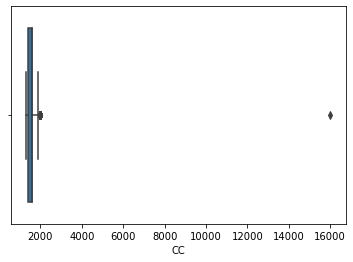

In [160]:
sns.boxplot(new_df['CC'])

In [161]:
##Iqr calculations for outlier detection
                 
per25=new_df['CC'].quantile(0.25)
per75=new_df['CC'].quantile(0.75)

iqr=per75-per25

upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr


print(upper_limit)
print(lower_limit)


# Finding the outliers

new_df[new_df['CC']>upper_limit]


#Dropping the outliers

new_df=new_df[new_df['CC']<upper_limit]

1900.0
1700.0


In [162]:
new_df[new_df['CC']>upper_limit]# No ouliers

,AGE,KM,HP,CC,Doors,Gears,Quarterly Tax,Weight,Price


In [163]:
new_df['HP'].unique()

array([192, 110,  97,  71,  98,  69, 116,  86, 107], dtype=int64)

In [164]:
new_df['AGE'].unique()

array([27, 25, 22, 31, 32, 28, 30, 24, 29, 26, 23, 19, 20, 11, 18, 13, 14,
       17,  7, 16, 15, 10, 12,  9,  8,  6,  2,  1, 44, 37, 42, 39, 40, 43,
       41, 34, 33, 38, 35, 36, 55, 51, 48, 49, 56, 50, 54, 53, 52, 47, 45,
       46, 64, 68, 59, 61, 67, 60, 66, 57, 65, 58, 63, 62, 71, 75, 77, 80,
       79, 73, 74, 78, 72, 76, 70, 69], dtype=int64)

In [165]:
new_df["Doors"].unique()

array([3, 5, 4, 2], dtype=int64)

In [166]:
new_df['Gears'].unique()

array([5, 6, 3, 4], dtype=int64)

In [167]:
new_df.columns


Index(['AGE', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Quarterly Tax', 'Weight',
       'Price'],
      dtype='object')

In [168]:
new_df.sample(50
             )

,AGE,KM,HP,CC,Doors,Gears,Quarterly Tax,Weight,Price
1395,76,49170,86,1300,3,5,69,1045,8750
1421,78,36000,86,1300,3,5,69,1045,8500
643,57,118833,110,1600,3,6,85,1065,10950
1371,75,57537,86,1300,5,5,69,1050,8950
756,65,80153,110,1600,5,5,85,1070,9950
140,20,22588,97,1400,5,5,85,1110,16450
1424,73,34717,86,1300,3,5,69,1015,7750
484,54,62519,97,1400,3,5,69,1025,9500
57,26,43000,97,1400,5,5,85,1110,15250
1194,78,89953,110,1600,5,5,19,1114,7500


In [169]:
new_df["Quarterly Tax"].value_counts()

85     612
69     549
19      71
100     18
197     12
72       3
64       2
163      1
Name: Quarterly Tax, dtype: int64

C:\Users\ppran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quarterly Tax'>

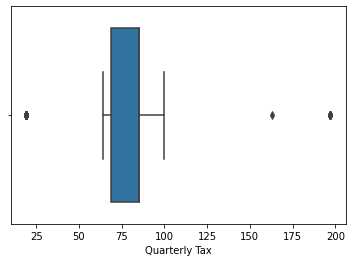

In [170]:
sns.boxplot(new_df["Quarterly Tax"])

In [171]:
##Iqr calculations for outlier detection
                 
per25=new_df["Quarterly Tax"].quantile(0.25)
per75=new_df["Quarterly Tax"].quantile(0.75)

iqr=per75-per25

upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr


print(upper_limit)
print(lower_limit)


# Finding the outliers

new_df[new_df["Quarterly Tax"]>upper_limit]



#Dropping the outliers

new_df=new_df[new_df["Quarterly Tax"]<upper_limit]


109.0
93.0


In [172]:

new_df[new_df["Quarterly Tax"]>upper_limit]# No outliers 

,AGE,KM,HP,CC,Doors,Gears,Quarterly Tax,Weight,Price


In [173]:
new_df[new_df["Quarterly Tax"]<lower_limit] # No outliers 

,AGE,KM,HP,CC,Doors,Gears,Quarterly Tax,Weight,Price
17,24,21716,110,1600,3,5,85,1105,17950
18,24,25563,110,1600,3,5,19,1065,16750
19,30,64359,110,1600,3,5,85,1105,16950
20,30,67660,110,1600,3,5,85,1105,15950
22,28,56349,110,1600,3,5,85,1120,15950
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [174]:
per25=new_df['Weight'].quantile(0.25)
per75=new_df['Weight'].quantile(0.75)

iqr=per75-per25

upper_limit= per75+1.5*iqr
lower_limit= per25+1.5*iqr


print(upper_limit)
print(lower_limit)


# Finding the outliers

new_df[new_df['Weight']>upper_limit]



#Dropping the outliers

new_df=new_df[new_df['Weight']<upper_limit]

1135.0
1095.0


In [175]:
new_df[new_df['Weight']<lower_limit]# No outliers 

,AGE,KM,HP,CC,Doors,Gears,Quarterly Tax,Weight,Price
18,24,25563,110,1600,3,5,19,1065,16750
55,32,45725,110,1600,5,5,85,1075,13250
65,26,32181,110,1600,5,5,19,1075,16950
71,32,29198,97,1400,5,5,85,1060,12995
106,14,11500,110,1600,3,5,69,1045,18800
...,...,...,...,...,...,...,...,...,...
1430,80,23000,86,1300,3,5,69,1015,8450
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500


In [176]:
new_df[new_df['Weight']>upper_limit]# No outliers 

,AGE,KM,HP,CC,Doors,Gears,Quarterly Tax,Weight,Price


In [177]:
x=df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [178]:
y=df["Price"]

In [179]:
x

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [180]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [181]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1005, 8), (431, 8), (1005,), (431,))

In [182]:
 from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [183]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(xtrain,ytrain)

ypred=lr.predict(xtest)

In [184]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error

In [185]:
r2_score(ytest,ypred)

0.8626587179727578

In [186]:
r2score=r2_score(ytest,ypred)

In [187]:
xtest.shape[1]

8

In [188]:
# Adjusted R2 Score

1-((1-r2score))* (xtest.shape[0]-1)/ (xtest.shape[0]-1-xtest.shape[1])

0.8600550917731893

In [189]:
mean_squared_error(ytest,ypred)

1912084.7234836915

In [190]:
mean_absolute_error(ytest,ypred)

1002.0949047093146

In [191]:
np.sqrt(mean_squared_error(ytest,ypred))

1382.781516901239

In [192]:
print("R2 Score:",r2score)
print("Adj R2 Score:",1-((1-r2score))* (431-1)/ (431-1-8))
print("Mean Squared Error",mean_squared_error(ytest,ypred))
print("Mean Absolute Error",mean_absolute_error(ytest,ypred))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(ytest,ypred)))

R2 Score: 0.8626587179727578
Adj R2 Score: 0.8600550917731893
Mean Squared Error 1912084.7234836915
Mean Absolute Error 1002.0949047093146
Root Mean Square Error: 1382.781516901239
